In [1]:
import pandas as pd
import random
import glob
import pathlib
import os
import cv2
import numpy as np
import sys
import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
import gc
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
data = pd.read_csv("labels.csv")

In [3]:
label_to_index = {'Cargo': 0, 'Military': 1, 'Carrier': 2, 'Cruise': 3, 'Tankers': 4}
index_to_label = {v: k for k, v in label_to_index.items()}

In [4]:
IMG_SIZE = 224

def preprocess_image(path):
    img = cv2.imread(path, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return (cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0)

In [5]:
x_train = np.zeros(shape=(len(data.image), IMG_SIZE, IMG_SIZE, 3))
for i, image in tqdm.tqdm(enumerate(data.image)):
    x_train[i] = preprocess_image("images\\" + image)

6252it [01:17, 80.38it/s] 


In [6]:
y_train = data.category
y_train = np.eye(np.max(y_train))[y_train - 1].astype(int)

In [7]:
print(x_train.shape)
print(y_train.shape)

(6252, 224, 224, 3)
(6252, 5)


In [8]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

BATCH_SIZE = 8

datagen = ImageDataGenerator(rotation_range=45, 
                             horizontal_flip=True, 
                             width_shift_range=0.5, 
                             height_shift_range=0.5, 
                             dtype='float32')
datagen.fit(x_train, augment=True, rounds=1, seed=2019)
train_generator = datagen.flow(x_train, y_train, 
                               batch_size=BATCH_SIZE, seed=2019)

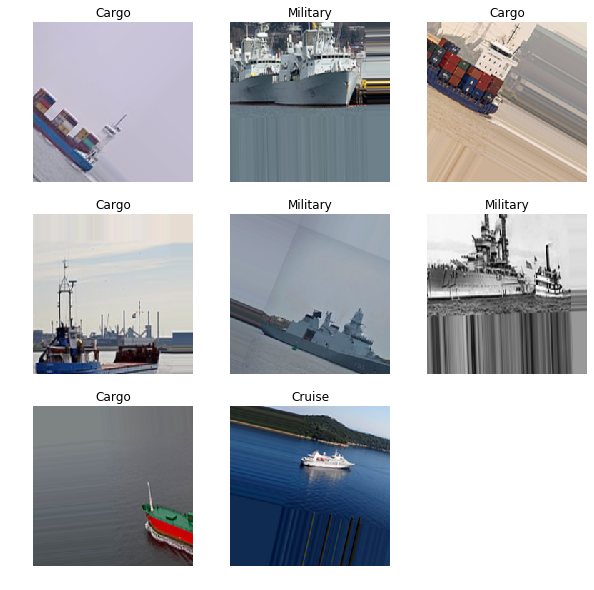

In [13]:
fig = plt.figure(figsize=(10, 10))
batch = next(train_generator)

# print(batch[1])

SIZE = 3

for i in range(8):
    ax1 = fig.add_subplot(SIZE, SIZE, i + 1)
    ax1.axis('off')
    ax1.title.set_text(index_to_label[np.where(batch[1][i]==1)[0][0]])
    ax1.imshow(batch[0][i])

In [11]:
base_model = keras.applications.Xception(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False)

model = keras.models.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

W0808 09:44:58.474740 11612 deprecation_wrapper.py:119] From c:\users\aya708\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0808 09:44:58.606933 11612 deprecation_wrapper.py:119] From c:\users\aya708\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0808 09:44:58.647930 11612 deprecation_wrapper.py:119] From c:\users\aya708\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0808 09:44:58.711872 11612 deprecation_wrapper.py:119] From c:\users\aya708\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is de

In [14]:
step_size_train = train_generator.n // train_generator.batch_size

gc.collect()
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10,
                   validation_data=[x_valid, y_valid])

W0808 09:45:51.395031 11612 deprecation.py:323] From c:\users\aya708\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
112/625 [====>.........................] - ETA: 4:11:10 - loss: 1.5950 - acc: 0.25 - ETA: 4:05:12 - loss: 1.6147 - acc: 0.12 - ETA: 4:02:51 - loss: 1.6171 - acc: 0.16 - ETA: 3:58:56 - loss: 1.5955 - acc: 0.18 - ETA: 3:56:35 - loss: 1.6001 - acc: 0.17 - ETA: 3:54:22 - loss: 1.5923 - acc: 0.18 - ETA: 3:42:46 - loss: 1.5800 - acc: 0.21 - ETA: 3:34:22 - loss: 1.5720 - acc: 0.25 - ETA: 3:28:26 - loss: 1.5855 - acc: 0.23 - ETA: 3:29:02 - loss: 1.5808 - acc: 0.22 - ETA: 3:28:48 - loss: 1.5722 - acc: 0.25 - ETA: 3:27:48 - loss: 1.5636 - acc: 0.26 - ETA: 3:23:13 - loss: 1.5719 - acc: 0.25 - ETA: 3:19:40 - loss: 1.5798 - acc: 0.25 - ETA: 3:17:59 - loss: 1.5648 - acc: 0.26 - ETA: 3:17:23 - loss: 1.5447 - acc: 0.29 - ETA: 3:15:27 - loss: 1.5371 - acc: 0.30 - ETA: 3:12:59 - loss: 1.5369 - acc: 0.31 - ETA: 3:11:21 - loss: 1.5273 - acc: 0.32 - ETA: 3:10:42 - loss: 1.5264 - acc: 0.34 - ETA: 3:11:20 - loss: 1.5272 - acc: 0.33 - ETA: 3:10:57 - loss: 1.5231 - acc: 0.34 - ETA: 3:11:02 - loss: 1

KeyboardInterrupt: 